In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv")

<ipython-input-3-c2c2d546f7dc>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv")


In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
for i in df.columns:
    print(i,":",df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [ ]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
df["quantity tons"] = pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"] = pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce")
df["delivery date_1"] = pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date


In [ ]:
df.dtypes

id                         object
item_date                 float64
quantity tons             float64
customer                  float64
country                   float64
status                     object
item type                  object
application               float64
thickness                 float64
width                     float64
material_ref               object
product_ref                 int64
delivery date             float64
selling_price             float64
item_date_1        datetime64[ns]
delivery date_1            object
dtype: object

In [ ]:
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00,2021-04-01,2021-04-01
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00,2021-04-01,2021-07-01
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.00,2021-04-01,2021-01-01
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.00,2021-04-01,2021-07-01
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00,2021-04-01,2021-04-01


In [ ]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [ ]:
df["material_ref"]= df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [ ]:
df["material_ref"].head()

0                DEQ1 S460MC
1                        NaN
2                   S0380700
3    DX51D+ZM310MAO 2.3X1317
4            2_S275JR+AR-CL1
Name: material_ref, dtype: object

In [ ]:
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery date_1         3
dtype: int64

In [ ]:
df.drop(columns=["id","material_ref"], inplace=True)

In [ ]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery date_1'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181672.0,20204588.226947,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.119094
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181672.0,20207381.557934,20190401.0,20201101.0,20210101.0,20210401.0,30310101.0,24110.589486
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [ ]:
df["quantity tons"] = df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"] = df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [ ]:
df.nunique()

item_date             252
quantity tons      181668
customer             1169
country                17
status                  9
item type               7
application            30
thickness             594
width                1386
product_ref            33
delivery date          28
selling_price        9789
item_date_1           250
delivery date_1        26
dtype: int64

In [ ]:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

Hanldling the null values by using Mean,Mode and median

In [ ]:
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery date_1"].fillna(df["delivery date_1"].mode().iloc[0],inplace=True)
df["item_date"].fillna(df["item_date"].mode().iloc[0], inplace=True)
df["status"].fillna(df["status"].mode().iloc[0], inplace=True)
df["delivery date"].fillna(df["delivery date"].mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

item_date           0
quantity tons       5
customer            1
country            28
status              0
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       0
selling_price       8
item_date_1         0
delivery date_1     0
dtype: int64

In [ ]:
df["quantity tons"].fillna(df["quantity tons"].median(),inplace = True)
df["customer"].fillna(df["customer"].median(),inplace = True)
df["country"].fillna(df["country"].median(),inplace = True)
df["application"].fillna(df["application"].median(),inplace = True)
df["thickness"].fillna(df["thickness"].median(),inplace = True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [ ]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [ ]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [ ]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
df['status'] = df['status'].map({'Won':1,'Draft':2,'To be approved':3,'Lost':0,'Not lost for AM':4,
                                'Wonderful':5,'Revised':6,'Offered':7,'Offerable':8})

In [ ]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [ ]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [ ]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [ ]:
df.to_csv("Industrial Copper new.csv", index=False)

Handling Skewness

In [ ]:
def plot(df,column):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("Distplot of"+" "+column)

    plt.subplot(1,3,2)
    sns.boxplot(df, x=column)
    plt.title("Boxplot of"+" "+column)

    plt.subplot(1,3,3)
    sns.histplot(df, x=column, kde=True, bins=30, color='blue')
    plt.title("Histogram of"+" "+column)


In [ ]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery date_1'],
      dtype='object')

In [ ]:
sk_columns = ['quantity tons', 'customer', 'country', 'status',
            'item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']

<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in s

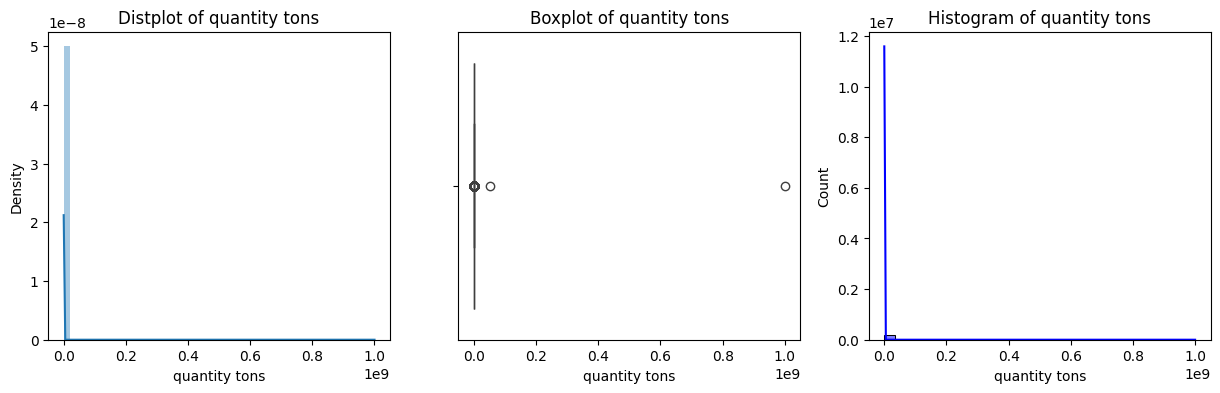

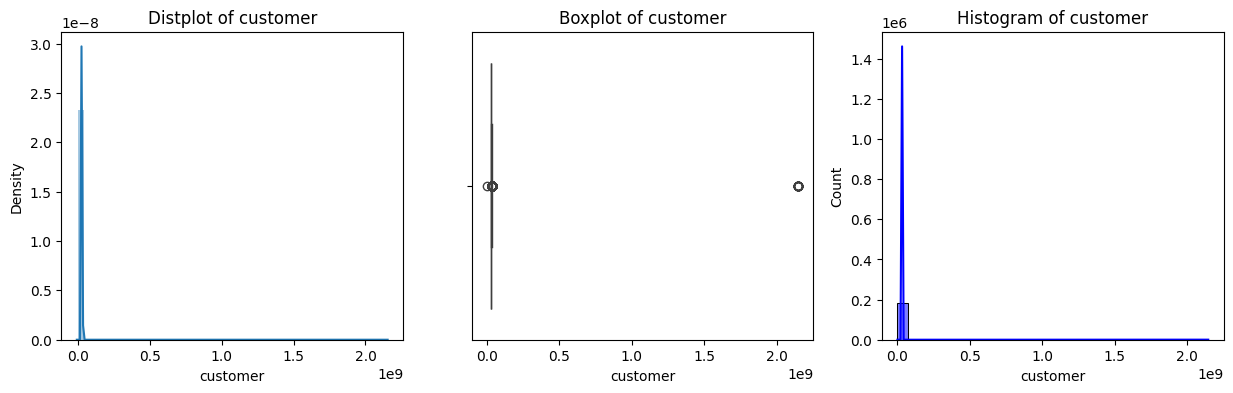

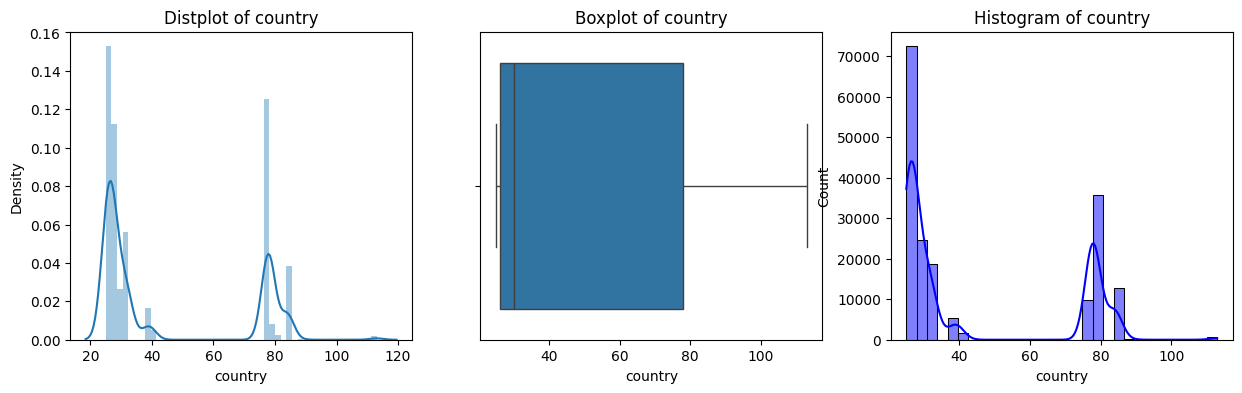

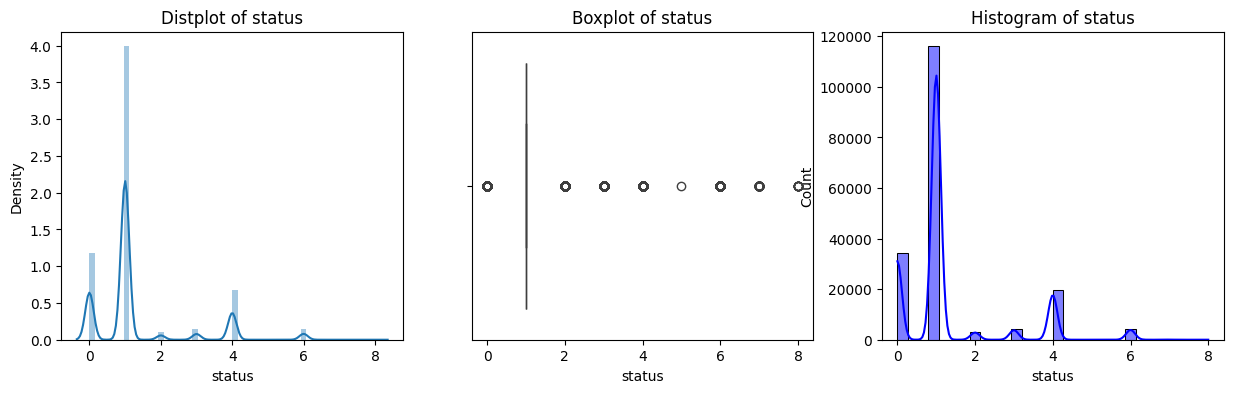

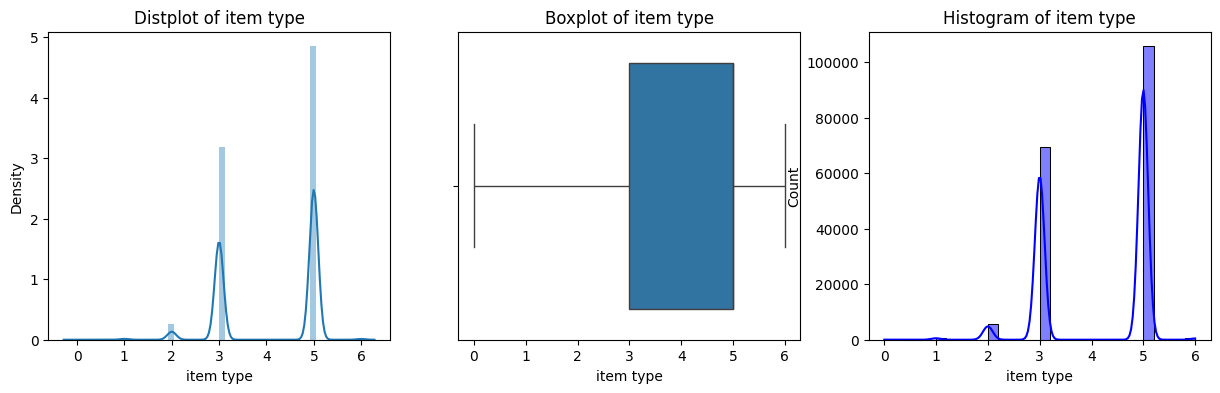

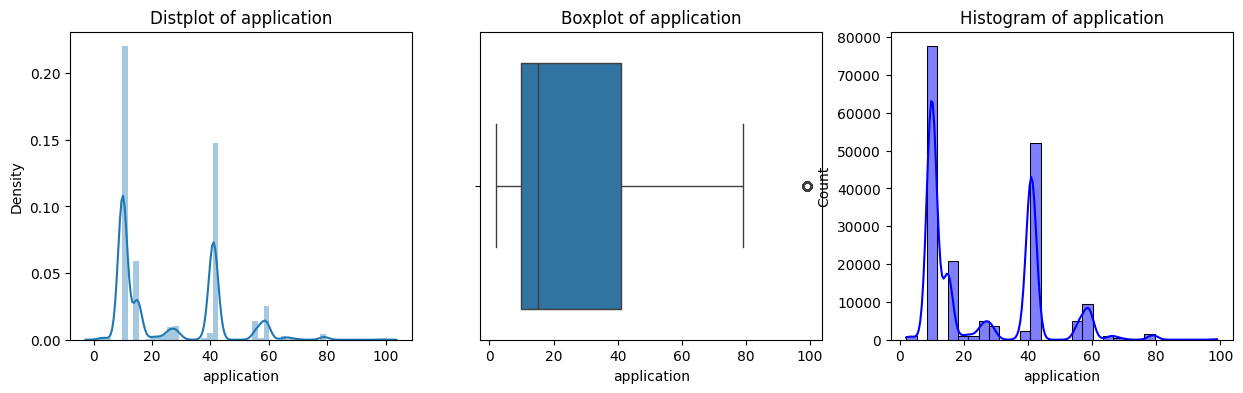

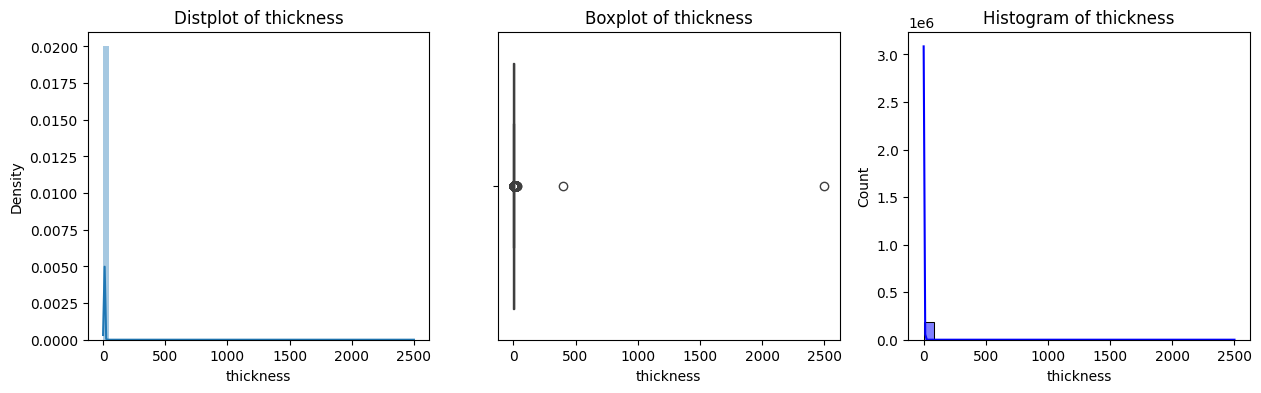

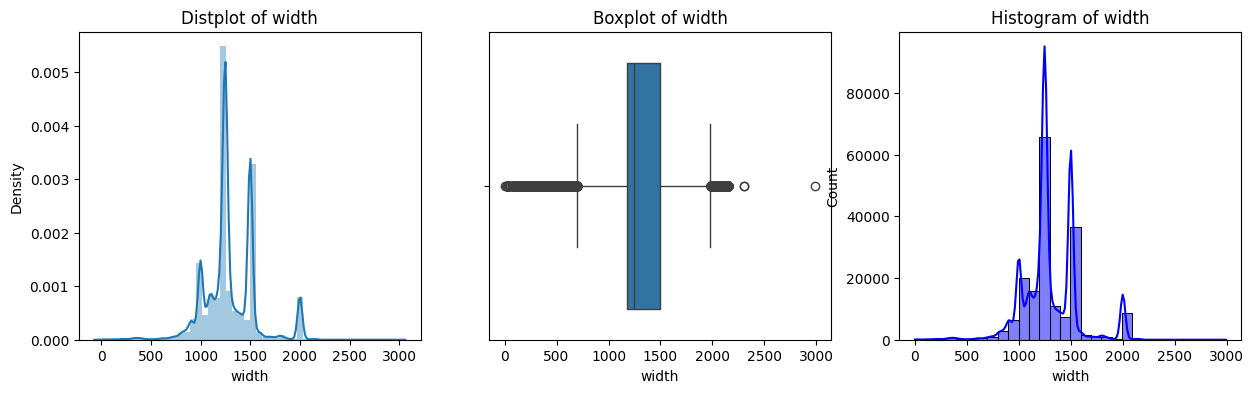

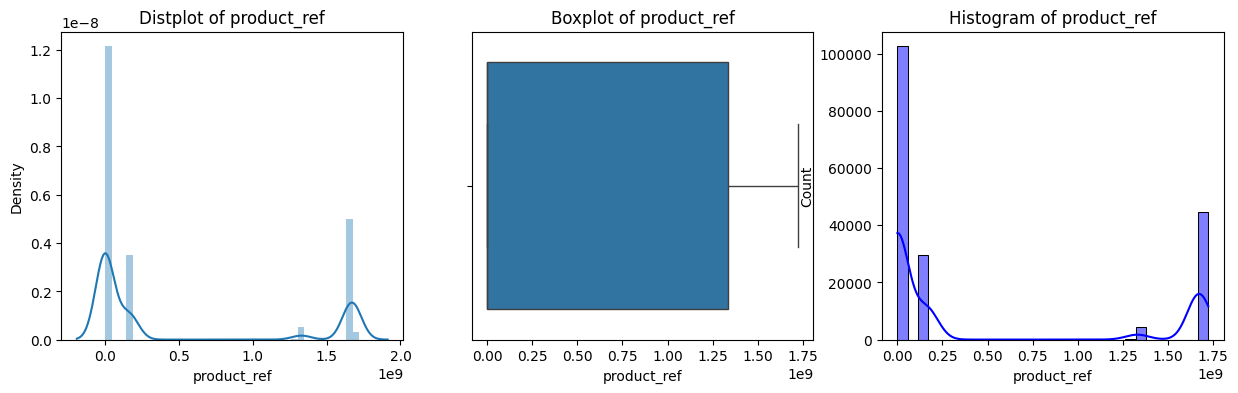

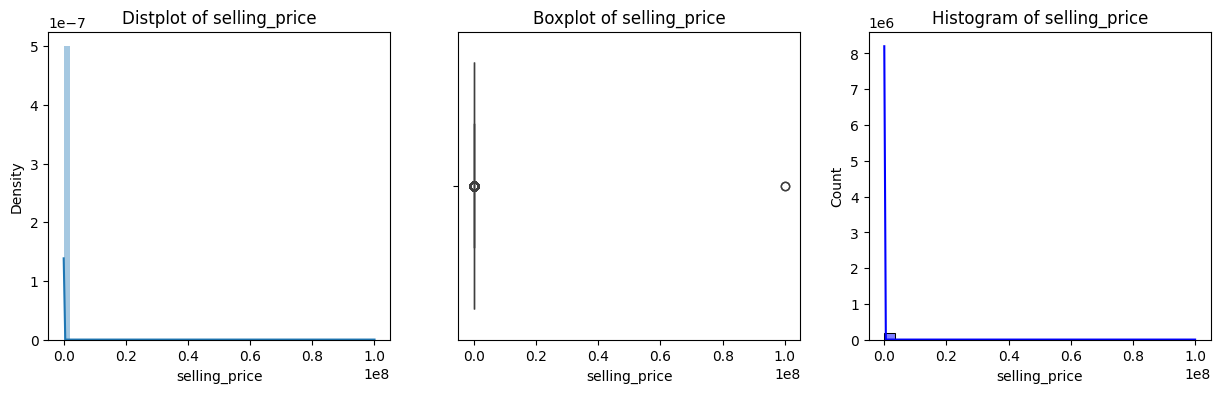

In [ ]:
for i in sk_columns:
  plot(df,i)

In [ ]:
#skewed columns
# 1. quantity tons
# 2. customer
# 3. thickness
# 4. selling_price

In [ ]:
df_1 = df.copy()

In [ ]:
# sk_columns = ['quantity tons', 'customer', 'country', 'status',
#             # 'item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']

In [ ]:
df_1['quantity tons log']= np.log(df_1['quantity tons'])
df_1['customer log']= np.log(df_1['customer'])
df_1['thickness log']= np.log(df_1['thickness'])
df_1['selling_price log']= np.log(df_1['selling_price'])

<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in s

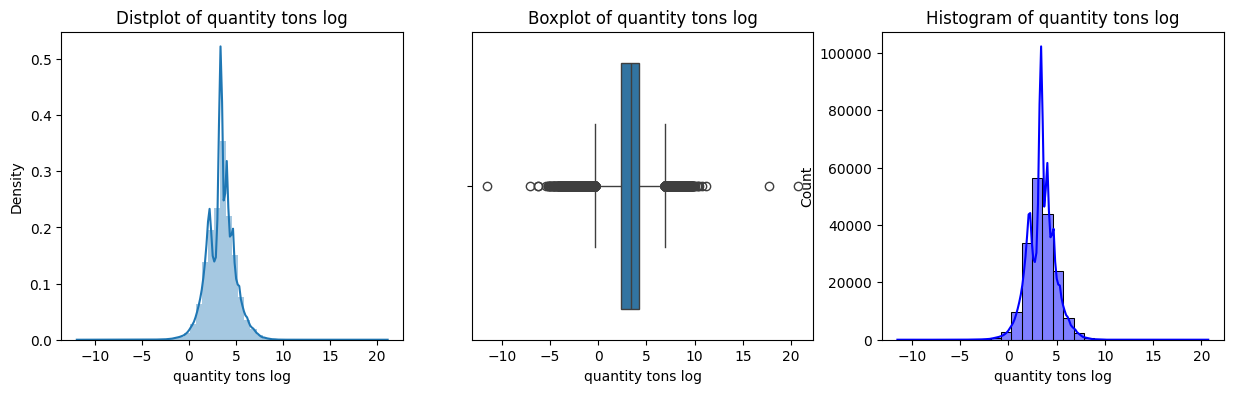

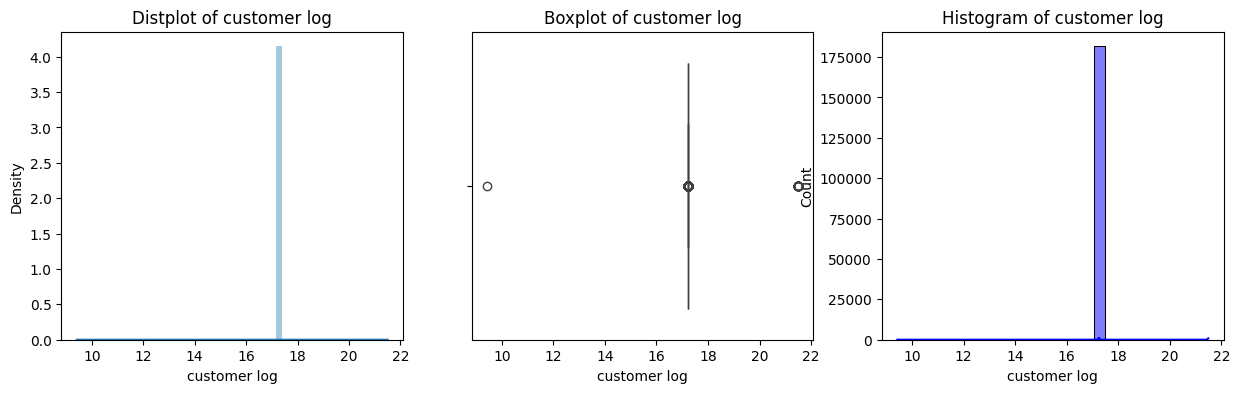

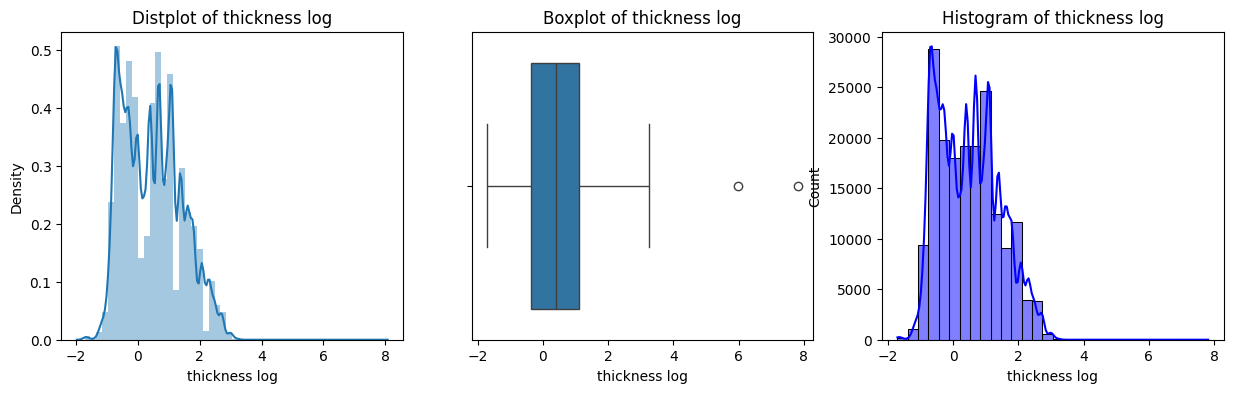

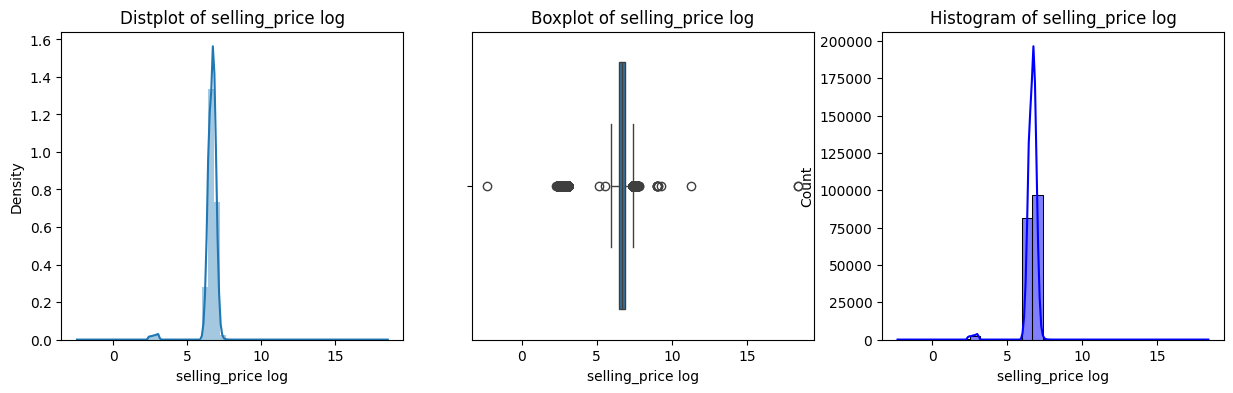

In [ ]:
sk_columns_2 = ["quantity tons log","customer log","thickness log","selling_price log"]

for i in sk_columns_2:
  plot(df_1,i)

Outliers Handling

In [ ]:
df_2 = df_1.copy()

In [ ]:
df_2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons log,customer log,thickness log,selling_price log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [ ]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q2= df[column].quantile(0.75)

  iqr = q2 - q1

  upper_threshold = q2 + (iqr*1.5)
  lower_threshold = q1 - (iqr*1.5)

  df[column] = df[column].clip(lower_threshold,upper_threshold)
# if lower threshold value is 5, all <5 values are changed to 5 and the same upper threshold



In [ ]:
df_2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673.0,20204588.208308,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.113503
quantity tons,181673.0,5874.905389,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.7765
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
status,181673.0,1.316684,0.0,1.0,1.0,1.0,8.0,1.33031
item type,181673.0,4.133036,0.0,3.0,5.0,5.0,6.0,1.05523
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402


In [ ]:
df_2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery date_1',
       'quantity tons log', 'customer log', 'thickness log',
       'selling_price log'],
      dtype='object')

In [ ]:
outlier_columns = ['quantity tons log','customer log','thickness log','selling_price log','width','application']

for i in outlier_columns:
  outlier(df_2,i)

In [ ]:
df_2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673.0,20204588.208308,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.113503
quantity tons,181673.0,5874.905389,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.7765
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
status,181673.0,1.316684,0.0,1.0,1.0,1.0,8.0,1.33031
item type,181673.0,4.133036,0.0,3.0,5.0,5.0,6.0,1.05523
application,181673.0,25.605164,2.0,10.0,15.0,41.0,87.5,17.718175
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1297.045583,700.0,1180.0,1250.0,1500.0,1980.0,248.961933
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402


<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-35-0466f5ecf834>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in s

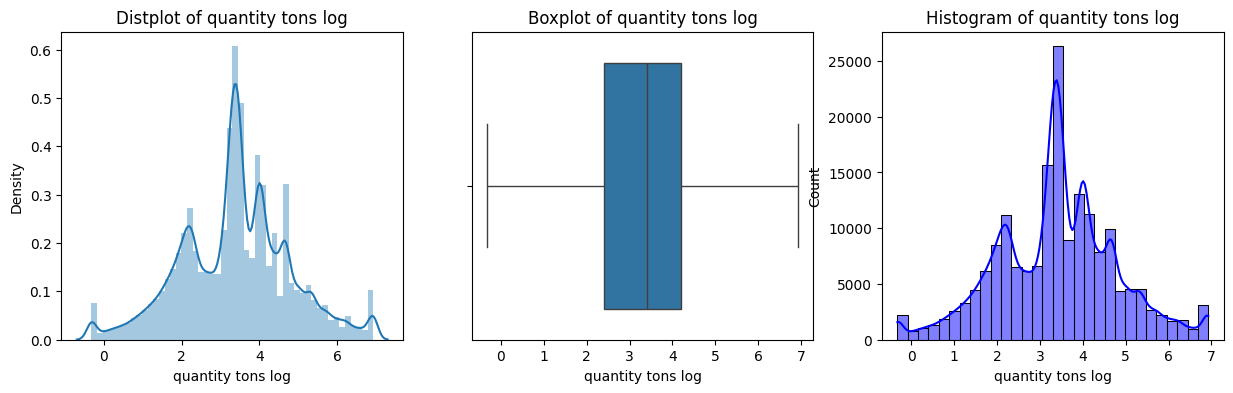

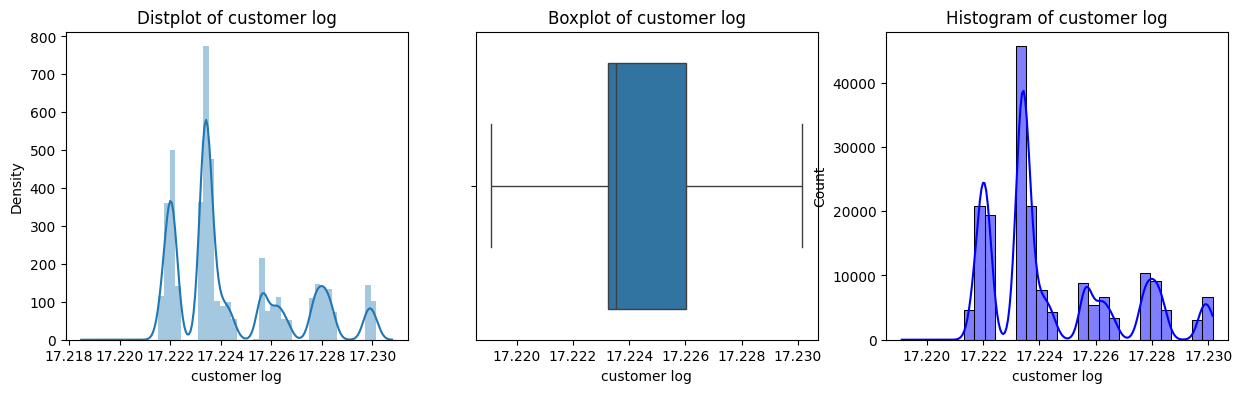

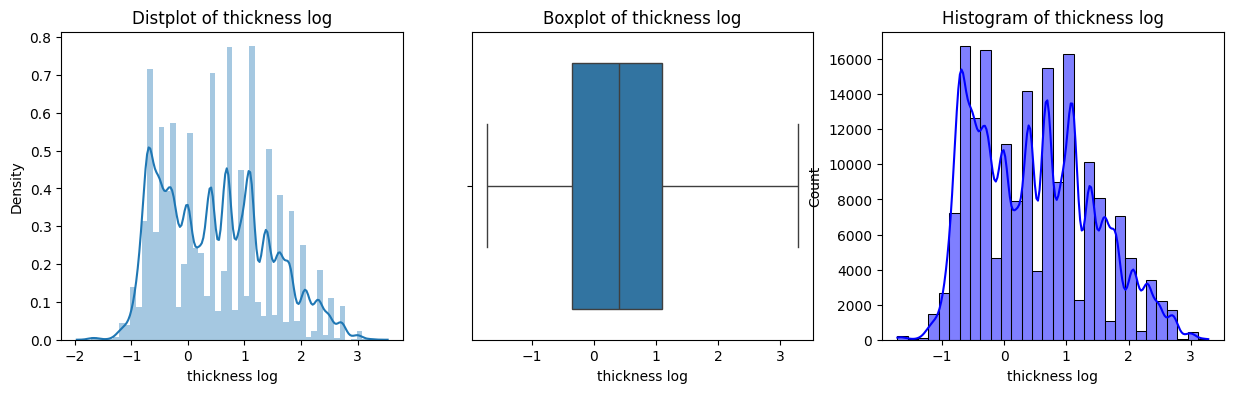

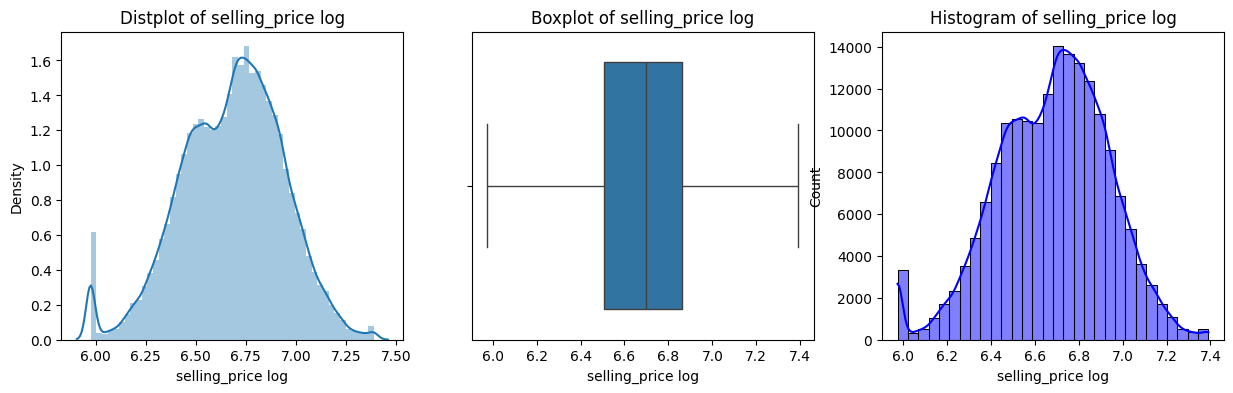

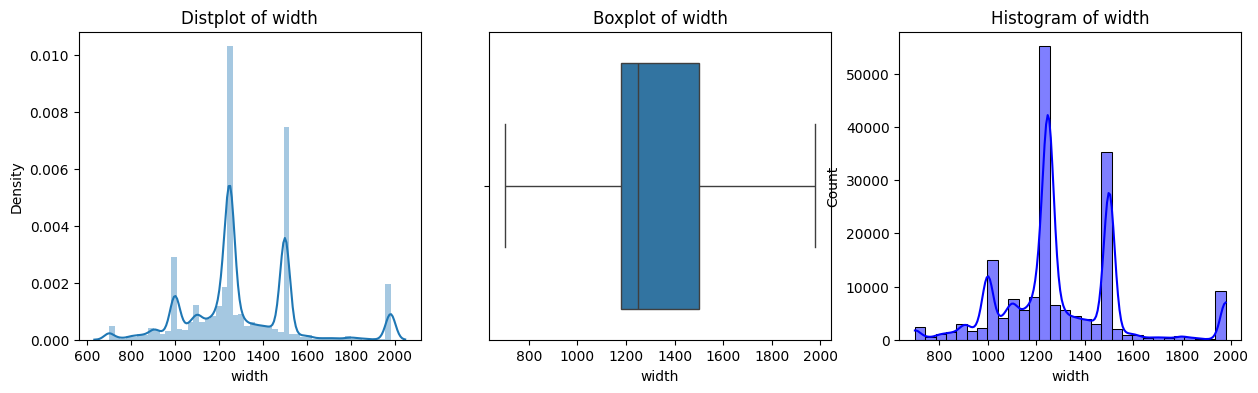

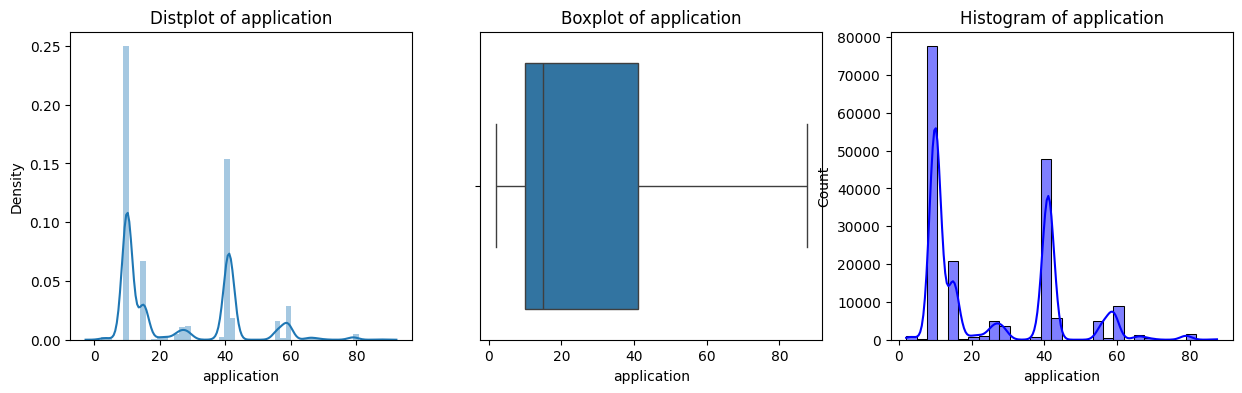

In [ ]:
for i in outlier_columns:
  plot(df_2,i)

In [ ]:
df_3= df_2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [ ]:
df_3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons log,customer log,thickness log,selling_price log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


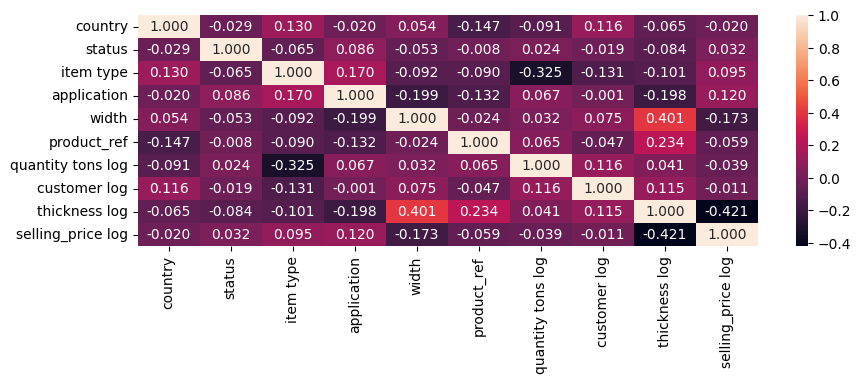

In [ ]:
corr = df_3.drop(columns =['item_date','delivery date','item_date_1', 'delivery date_1']).corr()

plt.figure(figsize=(10,3))
sns.heatmap(corr, annot=True,fmt="0.3f")
plt.show()

Handling delivery date

In [ ]:
df_4 = df_3.copy()

In [ ]:
df_4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons log,customer log,thickness log,selling_price log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [ ]:
df_4.dtypes

item_date                   float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date_1          datetime64[ns]
delivery date_1              object
quantity tons log           float64
customer log                float64
thickness log               float64
selling_price log           float64
dtype: object

In [ ]:
df_4['delivery date_1'] = pd.to_datetime(df_4['delivery date_1'])
df_4['item_date_1'] = pd.to_datetime(df_4['item_date_1'])

In [ ]:
df_4['date_differ'] = (df_4['delivery date_1'] - df_4['item_date_1']).dt.days

In [ ]:
df_4['date_differ'].head(15)

0     91
1      0
2    -90
3    -90
4    -31
5      0
6     91
7    -90
8     91
9      0
10    91
11   -90
12    91
13    91
14    91
Name: date_differ, dtype: int64

In [ ]:
df_4['item_date_day'] = df_4['item_date_1'].dt.day
df_4['item_date_month'] = df_4['item_date_1'].dt.month
df_4['item_date_year'] = df_4['item_date_1'].dt.year

In [ ]:
df_4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons log,customer log,thickness log,selling_price log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [ ]:
df4_pv = df_4[df_4["date_differ"]>=0]
df4_pv.reset_index(drop=True,inplace=True)

In [ ]:
df4_pv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons log,customer log,thickness log,selling_price log,date_differ,item_date_day,item_date_month,item_date_year
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [ ]:
df4_nv = df_4[df_4["date_differ"]<0]
df4_nv.reset_index(drop=True,inplace=True)

#Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery date_1',
       'quantity tons log', 'customer log', 'thickness log',
       'selling_price log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [ ]:
def accurate_date_prediction(df,alghorithm):
  x=df.drop(columns=['date_differ','item_date_1', 'delivery date_1'])
  y=df['date_differ']

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=53)

  model = alghorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  mse  = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)

  Metrics = {"Mean Squared Error":mse,"Root Mean Squared Error":rmse,
             "R2":r2,"Mean absolute error":mae}
  return Metrics


In [ ]:
print(accurate_date_prediction(df4_pv,DecisionTreeRegressor))
print(accurate_date_prediction(df4_pv,RandomForestRegressor))
print(accurate_date_prediction(df4_pv,ExtraTreesRegressor))
print(accurate_date_prediction(df4_pv,GradientBoostingRegressor))
print(accurate_date_prediction(df4_pv,AdaBoostRegressor))
print(accurate_date_prediction(df4_pv,XGBRegressor))


{'Mean Squared Error': 4.884577054329116, 'Root Mean Squared Error': 2.2101079282082843, 'R2': 0.9968746160111677, 'Mean absolute error': 0.01802917283242231}
{'Mean Squared Error': 4.314728417841934, 'Root Mean Squared Error': 2.077192436401099, 'R2': 0.997239232186678, 'Mean absolute error': 0.019097333373599496}
{'Mean Squared Error': 1.0423558692960466, 'Root Mean Squared Error': 1.0209583092840013, 'R2': 0.9993330512942413, 'Mean absolute error': 0.019619786790686475}
{'Mean Squared Error': 23.843244514730692, 'Root Mean Squared Error': 4.88295448624403, 'R2': 0.9847439616942661, 'Mean absolute error': 3.2973725020343063}
{'Mean Squared Error': 398.74366355007413, 'Root Mean Squared Error': 19.96856688773819, 'R2': 0.7448648986705539, 'Mean absolute error': 16.428539106549863}
{'Mean Squared Error': 1.3486968079965844, 'Root Mean Squared Error': 1.1613340639095129, 'R2': 0.9991370398373046, 'Mean absolute error': 0.21653457891602118}


In [ ]:
#Random Forest has less Error

In [ ]:
def Random_Forest(train_df, test_df):
    # Drop unnecessary columns and separate features and target for training data
    x_train = train_df.drop(columns=['item_date_1', 'delivery date_1', 'date_differ'])
    y_train = train_df['date_differ']

    # Train the model
    model = RandomForestRegressor(random_state=42).fit(x_ train, y_train)

    # Prepare the test data
    x_test = test_df.drop(columns=['item_date_1', 'delivery date_1', 'date_differ'])

    # Predict on test data
    y_pred = model.predict(x_test)

    return y_pred


In [ ]:
date_difference = Random_Forest(df4_pv, df4_nv)

In [ ]:
date_difference.dtype

dtype('float64')

In [ ]:
date_difference_1 = []
for i in date_difference:
  date = int(round(i,0))
  date_difference_1.append(date)



In [ ]:
df4_nv['date_differ'] = pd.DataFrame(date_difference_1)

<ipython-input-78-8ee0bb0a1a72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_nv['date_differ'] = pd.DataFrame(date_difference_1)


In [ ]:
df4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery date_1      0
quantity tons log    0
customer log         0
thickness log        0
selling_price log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [ ]:
def Find_Delivery_date(item_date_1,date_differ):
  delivery_date = item_date_1 + pd.Timedelta(date_differ,unit ="D")
  return delivery_date

In [ ]:
df4_nv['item_date_1'].head()

0   2021-04-01
1   2021-04-01
2   2021-04-01
3   2021-04-01
4   2021-04-01
Name: item_date_1, dtype: datetime64[ns]

In [ ]:
df4_nv['date_differ'].head()

0    17
1    17
2     0
3    17
4    17
Name: date_differ, dtype: int64

In [ ]:
df4_nv['delivery date_1'] = df4_nv['item_date_1'] + pd.to_timedelta(df4_nv['date_differ'], unit="D")


<ipython-input-85-185f82f128ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_nv['delivery date_1'] = df4_nv['item_date_1'] + pd.to_timedelta(df4_nv['date_differ'], unit="D")


In [ ]:
df_final = pd.concat([df4_nv,df4_pv],axis=0,ignore_index=True)

In [ ]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons log,customer log,thickness log,selling_price log,date_differ,item_date_day,item_date_month,item_date_year
181668,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
181669,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
181670,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
181671,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
181672,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [ ]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["delivery date_1"].dt.day
df_final['delivery_date_month']= df_final["delivery date_1"].dt.month
df_final['delivery_date_year']= df_final["delivery date_1"].dt.year

In [ ]:
df_final.head(2)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,...,customer log,thickness log,selling_price log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-18,...,17.221827,-0.967584,6.468211,17,1,4,2021,18,4,2021
1,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-18,...,17.228293,0.832909,6.643790,17,1,4,2021,18,4,2021


In [ ]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery date_1',
       'quantity tons log', 'customer log', 'thickness log',
       'selling_price log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [ ]:
# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_1","delivery date_1","date_differ"],inplace=True)

In [ ]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity tons log', 'customer log', 'thickness log',
       'selling_price log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [ ]:
# Saveing the dataframe
df_final.to_csv("Industrial_Copper_new_1).csv",index= False)

In [ ]:
# This DataFrame is ready to ML Prediction and has no null values

#Classification Method - Prediction

In [ ]:
df5 = pd.read_csv(r"/content/Industrial_Copper_new_1).csv")

In [ ]:
df5.dtypes

,0
country,float64
status,int64
item type,float64
application,float64
width,float64
product_ref,int64
quantity tons log,float64
customer log,float64
thickness log,float64
selling_price log,float64


In [ ]:
 from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [ ]:
df_class = df5.copy()

In [ ]:
df_c = df_class[(df_class["status"]==1)|(df_class["status"]==0)]

In [ ]:
df_c.tail()

,country,status,item type,application,width,product_ref,quantity tons log,customer log,thickness log,selling_price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,0,3.0,15.0,1980.0,640665,3.472467,17.224270,1.791759,6.313548,2,7,2020,1,8,2020
181669,30.0,0,3.0,10.0,1525.0,640665,4.196171,17.222079,1.348073,6.126869,2,7,2020,1,8,2020
181670,30.0,0,3.0,10.0,1525.0,640665,4.156686,17.222079,1.766442,6.124683,2,7,2020,1,8,2020
181671,30.0,0,3.0,10.0,1500.0,640665,4.025862,17.222079,2.060514,6.126869,2,7,2020,1,8,2020
181672,30.0,0,3.0,10.0,1830.0,640665,5.328963,17.222079,1.348073,6.131226,2,7,2020,1,8,2020


In [ ]:
df_c.value_counts("status")

,count
status,
1,116012
0,34438


In [ ]:
# Now the Data is Imbalanced. So Further i do the Resampling method to balance the data

In [ ]:
x= df_c.drop(columns=["status"], axis=1)
y= df_c["status"]

In [ ]:
x.shape, y.shape

((150450, 15), (150450,))

In [ ]:
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [ ]:
x_new.shape, y_new.shape

((230192, 15), (230192,))

In [ ]:
y_new.value_counts()

,count
status,
1,115096
0,115096


In [ ]:
# Now the data is Balanced
# can continue the ML Prediction

In [ ]:
def accuracy_checking(x_data,y_data,alghorithm):
  # train test spliting
  x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.2,random_state=42)

  model = alghorithm().fit(x_train,y_train)

  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  metrics = {"Alghorithm": alghorithm.__name__,
             "Accuracy_Train": train_acc,
             "Accuracy_Test": test_acc}

  return metrics



In [ ]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Alghorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9475905616483882}
{'Alghorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9693918245264207}
{'Alghorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9740445330674643}
{'Alghorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8146975739448322, 'Accuracy_Test': 0.8153871718178797}
{'Alghorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8351362578929877, 'Accuracy_Test': 0.8390162844798936}
{'Alghorithm': 'XGBClassifier', 'Accuracy_Train': 0.9469425058158857, 'Accuracy_Test': 0.93678963110668}


In [ ]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Alghorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9634925463948889}
{'Alghorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9820070407231952}
{'Alghorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9851579816593506}
{'Alghorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7732300404189665, 'Accuracy_Test': 0.7722847581381199}
{'Alghorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8189730105610848, 'Accuracy_Test': 0.8184623408231562}
{'Alghorithm': 'XGBClassifier', 'Accuracy_Train': 0.9554685123212656, 'Accuracy_Test': 0.9490199487157199}


In [ ]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good interpretability, so i select this algorithm

In [ ]:
# Get the high accuracy when using Hyperparameter Tuning method from GridsearchCV
x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.4, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= 3,verbose=3)
gridsearch.fit(x_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
